In [10]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [27]:
y, sr = librosa.load('test.wav')
T = librosa.onset.onset_detect(y=y, sr=sr, units='time')
T

array([0.95201814, 2.02013605, 2.55419501, 3.04181406])

In [25]:
librosa.feature.chroma_stft(y=y, sr=sr)

array([[0.83151466, 0.66994756, 0.48422933, ..., 0.7365047 , 0.9516353 ,
        0.5214383 ],
       [0.39930388, 0.8328771 , 0.925707  , ..., 0.50176346, 0.9181991 ,
        0.59357   ],
       [0.39684772, 0.53707135, 0.440921  , ..., 0.4036709 , 0.8590625 ,
        0.51991194],
       ...,
       [0.3824799 , 0.15100862, 0.13500842, ..., 1.        , 0.9599287 ,
        0.5194535 ],
       [0.3736677 , 0.15753824, 0.11709873, ..., 0.98849684, 1.        ,
        0.41047367],
       [0.7333226 , 0.403109  , 0.2030926 , ..., 0.8952516 , 0.98267245,
        0.44018373]], dtype=float32)

In [8]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.7248706 , 0.38726357, 0.21714583, ..., 0.33369297, 0.3500074 ,
        0.29070202],
       [0.5106124 , 0.733584  , 0.7147414 , ..., 0.1675278 , 0.17247684,
        0.26336515],
       [0.34621903, 0.26618052, 0.19234286, ..., 0.10856119, 0.10902195,
        0.34050915],
       ...,
       [0.0583066 , 0.03249939, 0.02011744, ..., 1.        , 1.        ,
        1.        ],
       [0.08856882, 0.06926104, 0.04715125, ..., 0.9030598 , 0.92609584,
        0.8787978 ],
       [0.2088294 , 0.06479577, 0.01046725, ..., 0.5649596 , 0.5924032 ,
        0.6866495 ]], dtype=float32)

[Text(0.5, 1.0, 'Chromagram')]

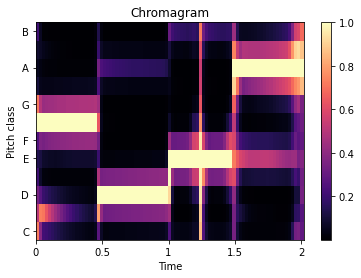

In [11]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [12]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

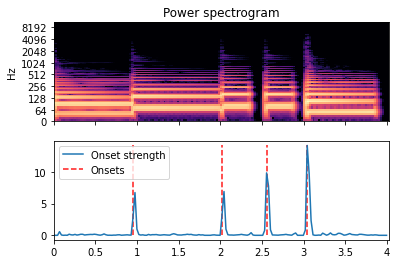

In [13]:
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

In [14]:
def chroma(y, sr):
    S = np.abs(librosa.stft(y, n_fft=4096))**2
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='Chromagram')

IndexError: index 4 is out of bounds for axis 0 with size 4

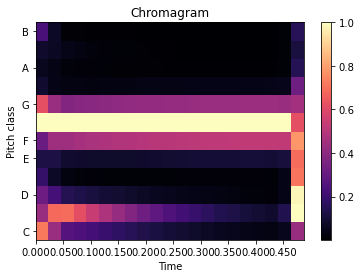

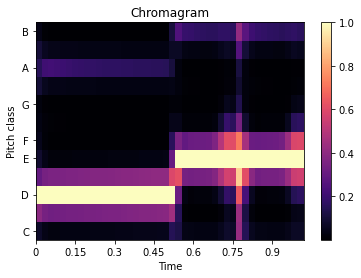

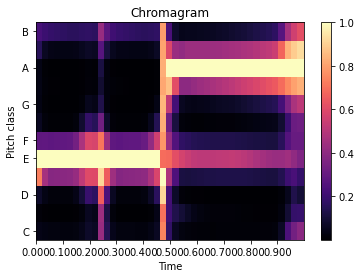

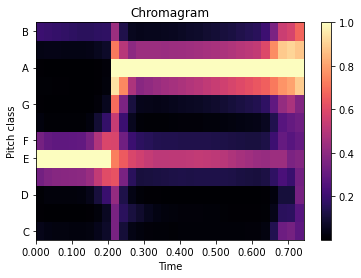

In [30]:
count = 0
while True:
    if count == 0:
        a, sr = librosa.load('test.wav', offset=0, duration=T[count])
    else:
        a, sr = librosa.load('test.wav', offset=T[count-1], duration=T[count])
    
    chroma(a, sr)
    
    if count == len(T-1):
        break
    
    count += 1